## Module 1 Final Project Submission

* Student name: THOMAS WHIPPLE
* Student pace: PART TIME
* Scheduled project review date/time: FRIDAY, 10/25/2019, 12pm
* Instructor name: ABHINEET KULKARNI
* Blog post URL:


## The King County Housing Data

#### We begin by loading the data, looking at the contents, and starting to clean it.

In [1]:
# Load the data set and check the header
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# Get a look at the features, total entries, and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Detecting Missing Data

In [3]:
# First I need to look at columns 'yr_renovated' and 'waterfront' due to the NaN data.
# 'yr_renovated  17755' and 'waterfront  19221'
# The column 'view 21534' is also missing some information though it may be minimal.

In [4]:
# I also realized that 'date' and 'sqft_basement' contain objects!

In [5]:
# My first look for missing data is confirmed
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# Determine the percent of missing data.
missing_1 = 3842/21597
print("'yr_renovated' feature is missing about " + str(round(missing_1*100)) + " percent of the data.")

'yr_renovated' feature is missing about 18 percent of the data.


In [7]:
# Determine the percent of missing data.
missing_2 = 2376/21597
print("'waterfront' feature is missing about " + str(round(missing_2*100)) + " percent of the data.")

'waterfront' feature is missing about 11 percent of the data.


In [8]:
# While both of these features are missing a lot of data, it doesn't constitute deleting their columns.

In [9]:
# Use describe method to further look at the data.
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# Many of the columns have max/mins that probably include outliers. I'll deal with that later.

### Which other columns or rows are hiding something?

#### Let's start with 'bedrooms' and look closer.

In [11]:
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [12]:
# Just in case this house is a mansion with 33 bedrooms, I wanted to look at the whole row.
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [13]:
# Looks as if the number was just entered incorrectly.  Should I delete it?  Change it to just '3'?

In [14]:
# I think it's just a typo, so I'll change it to the median.
data.at[15856,'bedrooms'] = 3

In [15]:
# Let's look at the number of houses with more than 3 standard deviations.
data.bedrooms.std()*3 + data.bedrooms.mean()

6.084099911153768

In [16]:
# Drop all 'bedrooms' rows that are greater than three standard deviations.
data = data[data.bedrooms < 6]

In [17]:
data.bedrooms.describe()

count    21264.000000
mean         3.325997
std          0.827790
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedrooms, dtype: float64

#### I'm excited to see the variety of 'bathrooms' that houses might have.

In [18]:
# I guess some houses really do have a lot of bathrooms.
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 0.5 , 5.5 , 5.75,
       6.75, 6.  , 6.25, 6.5 ])

In [19]:
data.loc[data['bathrooms'] == 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [20]:
# Two houses with eight bathrooms or similar, meaning it's probably not an error but they are outliers. 

In [21]:
# Let's look at the number of houses with more than 3 standard deviations.
data.bathrooms.std()*3 + data.bathrooms.mean()

4.348497290049741

In [22]:
# Drop all 'bathrooms' rows that are greater than three standard deviations.
data = data[data.bathrooms < 4.42]
data.bathrooms.describe()

count    21131.000000
mean         2.081918
std          0.718829
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          4.250000
Name: bathrooms, dtype: float64

#### What different kind of 'floors' do the houses have?

In [23]:
data.floors.unique()  

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [24]:
# Are floor levels continuous?
# Does 2.5 floors make sense?  I think I will just leave these as a continuous variable.

#### The 'id' feature is has really big numbers. 

In [25]:
data.id.unique() 

array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157])

In [26]:
# Probably gonna just drop these since the number don't really mean anything.

In [27]:
# Drop 'id' from the dataset.
data = data.drop(["id"], axis=1)

#### Either you have 'waterfront' or you don't, right?

In [28]:
data.waterfront.unique()

array([nan,  0.,  1.])

In [29]:
# I think all the 'nan's should just become 0.

In [30]:
# Let's get rid of the Nan's, change them to '0'
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)

In [31]:
# That's better.
data.waterfront.unique()

array([0., 1.])

#### What is this 'view' all about?

In [32]:
data.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [33]:
# This is going to be tough! Is this continuous?  Should the nan's really be 0's?

In [34]:
# Let's get rid of the Nan's, change them to '0'
data.view.fillna(value=data.view.median(), inplace = True)

#### How many homes have a 'view' of 4, the max?

In [35]:
# Determine the number of entries with the max number of viewings.
len(data.loc[data['view'] == 4])

284

In [36]:
# 294 homes feel as if their view is a "4".  Is that 4 stars?  4/5?  Definitely Categorical, should be binned!

#### What about that house with 13,540 sq. ft. of 'living space'?

In [37]:
data.sqft_living.describe()

count    21131.000000
mean      2040.156121
std        853.791164
min        370.000000
25%       1410.000000
50%       1890.000000
75%       2510.000000
max       7850.000000
Name: sqft_living, dtype: float64

In [38]:
# Looks like we already got rid of one outlier.  Are there more?
data.loc[data['sqft_living'] == 7850]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19842,1/22/2015,2700000.0,4,4.0,7850,89651,2.0,0.0,0.0,3,12,7850,0.0,2006,0.0,98027,47.5406,-121.982,6210,95832


In [39]:
# I guess it's just a big, expensive house.  Lots of bedrooms and bathrooms.  But is it an outlier still?

In [40]:
# What are three standard deviations from the mean?
data.sqft_living.std()*3 + data.sqft_living.mean()

4601.529613339778

In [41]:
# How many houses fall outside of this?
len(data.loc[data["sqft_living"] > 4647.71])

192

In [42]:
# Let's delete those outliers
data = data[data.sqft_living < 4647.71]

In [43]:
data.sqft_living.describe()

count    20939.000000
mean      2010.340370
std        796.380043
min        370.000000
25%       1410.000000
50%       1880.000000
75%       2490.000000
max       4645.000000
Name: sqft_living, dtype: float64

#### What is an average 'sqft_lot' size?

In [44]:
# The average lot size is about a third of an acre?  43,560 sqft is an acre, but I don't really speak acres.
data.sqft_lot.mean()

14566.324036486938

In [45]:
# Mean plus three standard deviations.
data.sqft_lot.mean() + data.sqft_lot.mean()*3

58265.29614594775

In [46]:
# Number of homes that above the range.
len(data.loc[data["sqft_lot"] > 58248])

670

In [47]:
# That's a lot of houses!

In [48]:
# Delete all those rows... they are outliers.
data = data[data.sqft_lot < 58248]

In [49]:
data.sqft_lot.describe()

count    20269.000000
mean      9323.947210
std       8298.398602
min        520.000000
25%       5000.000000
50%       7420.000000
75%      10026.000000
max      58157.000000
Name: sqft_lot, dtype: float64

#### Where can I find information on how King County 'grades' their homes?

In [50]:
data.grade.unique()

array([ 7,  6,  8,  9,  5, 10, 11,  4, 12,  3, 13])

In [51]:
# Can I bin these?  Let's do it later.

#### 'Basements'? Can I just say YES/NO to make it easier?

In [52]:
# Number of unique basement sizes.
data.sqft_basement.nunique()

263

In [53]:
# Is there anything else hidding in there?
data.sqft_basement.value_counts().head()

0.0      12142
?          419
600.0      206
500.0      203
700.0      200
Name: sqft_basement, dtype: int64

In [54]:
# After looking at .unique(), I see that there are lots of different basements, including "0".
# Plus, 454 of them are "?"

In [55]:
# Let's just change them to '0'  - either you have a basement or not.
data.sqft_basement = data.sqft_basement.replace(to_replace = '?', value = 0)

In [56]:
# Looks like they are gone!
data.loc[data['sqft_basement'] == '?']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [57]:
data.sqft_basement.describe()

count     20269
unique      263
top         0.0
freq      12142
Name: sqft_basement, dtype: object

In [58]:
# Let's also fill in those Nan's with the median.
data.sqft_basement.fillna(value=data.sqft_basement.median(), inplace = True)

In [59]:
# Since 'basement' also came up as an 'object' I'm going to change them to floats.
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [60]:
data.sqft_basement.describe()

count    20269.000000
mean       268.637723
std        410.089043
min          0.000000
25%          0.000000
50%          0.000000
75%        520.000000
max       2330.000000
Name: sqft_basement, dtype: float64

In [61]:
# There are still lots of zeros in this column. Perhaps it's better to bin these?  Soon enough...

#### How important is 'sqft_above'?  Especially since I know the total?

In [62]:
# 'sqft_above' seems continuous.  Or is this number really just the total sqaure foot minus the basement?

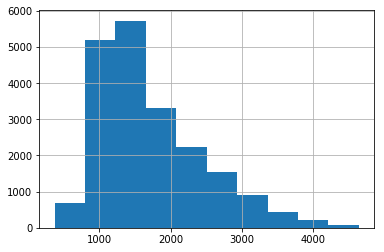

In [63]:
# Let's look at a histogram of this.  Gonna need matplotlib library!
import matplotlib.pyplot as plt
%matplotlib inline
data.sqft_above.hist()

In [64]:
# Again, using 3 standard deviations to predict outliers
data.sqft_above.mean()+data.sqft_above.std()*3

3916.852742072298

In [65]:
# Let's get rid of the outliers
data = data[data.sqft_living15 < 3926.47]

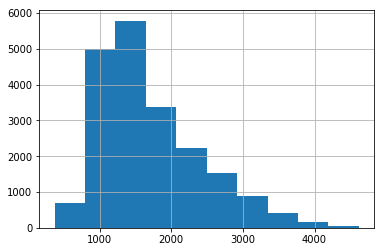

In [66]:
# Now the histogram looks a little better.
data.sqft_above.hist()

In [67]:
# Also, is this features going to effect the multicollinearity?

#### What does the 'condition' feature look like?

In [68]:
data.condition.unique()

array([3, 5, 4, 1, 2])

In [69]:
# Should I consider binning these? Most of them are '3'.  Seems like it's a categorical feature.  Let's do it later.

Text(0.5, 1.0, 'Condition of King County Homes')

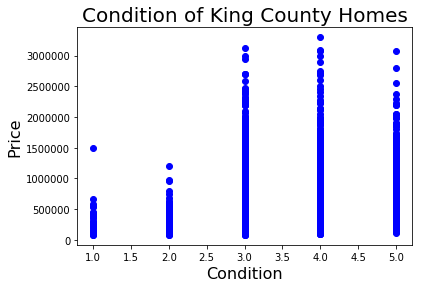

In [70]:
# Let's take a look at a scatter plot of this feature
plt.scatter(y=data['price'], x=data['condition'], color='blue')
plt.ylabel('Price',fontsize=16)
plt.xlabel('Condition',fontsize=16)
plt.title("Condition of King County Homes", fontsize=20)

#### Neighboring 'living size' has entries way beyond the 3 standard deviations.

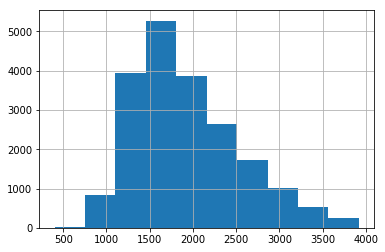

In [71]:
# Let's look at the histogram.
data.sqft_living15.hist()

In [72]:
# Again, using 3 standard deviations to predict outliers
data.sqft_living15.mean()+data.sqft_living15.std()*3

3757.7460599808824

In [73]:
# There's some neighbors that we can eliminate.
len(data.loc[data["sqft_living15"] > 3759.40])

97

In [74]:
# Let's get rid of the outliers
data = data[data.sqft_living15 < 3759.40]

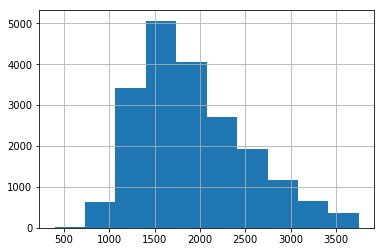

In [75]:
# Let's look at the right skewed histogram - a little better.
data.sqft_living15.hist()

#### Neighboring 'lot size' has a bunch of big values.

In [76]:
data.sqft_lot15.describe()

count     20009.000000
mean       9108.356789
std       10715.284536
min         651.000000
25%        5000.000000
50%        7455.000000
75%        9630.000000
max      380279.000000
Name: sqft_lot15, dtype: float64

In [77]:
# Let's do the same here.
data.sqft_lot15.mean() + data.sqft_lot15.std()*3

41254.21039844921

In [78]:
# How many are there?
len(data.loc[data["sqft_lot15"] > 41121.87])

311

In [79]:
# Let's get rid of the outliers
data = data[data.sqft_lot15 < 41121.87]

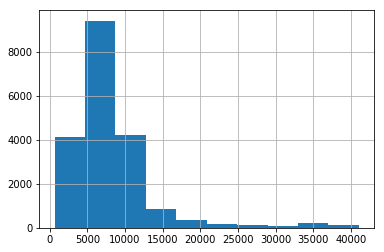

In [80]:
# Still pretty right skewed!  Maybe Log Transformations?  I'll work on that later.
data.sqft_lot15.hist()

In [81]:
# These numbers seem continuous, especially if you speak square footage.
# Also, are these related to zipcode?  Usually neighborhoods have similar sized houses!

#### Still have to deal with zipcode, lat, and long

In [82]:
# 'zipcode' is somehow related to 'lat' and 'long' right?!

#### The 'yr_built' feature seems pretty standard. But is it continuous?

In [83]:
data.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 1995, 1963, 1960, 2003, 1942, 1927,
       1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1985, 1941, 1915,
       1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 1984, 2014,
       1922, 1959, 1966, 1953, 1950, 2008, 1968, 1991, 1954, 1973, 1925,
       1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006, 1988,
       2001, 1962, 1939, 1946, 1967, 1975, 1910, 1978, 1905, 1980, 1971,
       2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 1976, 1949, 1999,
       1901, 1993, 1920, 2007, 1943, 1983, 1940, 1918, 1928, 1974, 1911,
       1936, 1937, 1908, 1931, 1957, 1998, 1913, 2013, 1907, 1997, 1958,
       2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970, 1982,
       2015, 1934, 1938, 1919, 1906, 1935])

In [84]:
# Perhaps I can do something with these numbers to even them out.

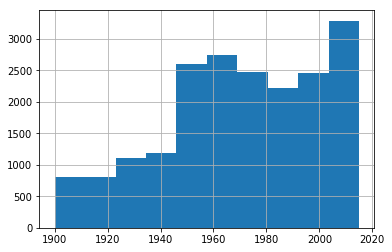

In [85]:
data.yr_built.hist()

In [86]:
# Is this a left skewed histogram? Do I have to do anything to it? The numbers seem pretty continuous.

#### The 'year renovated' is certainly going to be more difficult.

In [87]:
data.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1978., 2005.,
       2003., 1994., 1984., 2014., 2011., 1983., 1945., 1988., 1977.,
       1981., 1995., 2000., 1999., 1998., 1970., 2004., 1986., 2007.,
       1990., 1987., 2006., 2001., 1980., 1971., 1979., 1997., 1950.,
       1969., 1948., 2009., 2015., 1974., 2008., 1989., 2012., 1968.,
       1951., 1962., 1953., 1993., 1955., 1996., 1982., 1985., 1963.,
       1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959., 1960.,
       1956., 1967., 1965., 1934., 1972., 1944., 1958.])

In [88]:
# Some how I have to deal with these. Most of them have not been renovated.  Some are 'Nan'. 
# Can I bin them into a few groups - recently renovated, renovated a while ago, and not at all?

In [89]:
# Let's fill in the "Nan's" with 0.
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)

In [90]:
data.yr_renovated.describe()

count    19698.000000
mean        65.672708
std        356.098364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [91]:
# I think I want to bin them.  I'll do all the binning in a bit...

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


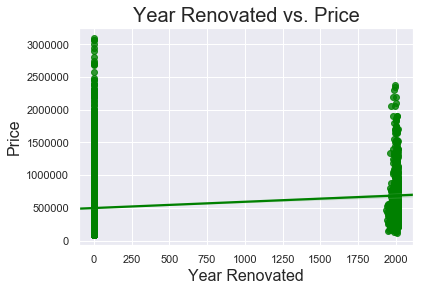

In [92]:
# Let's take a look at a scatter plot here. And I'm going to make it fancy with 'seaborn'!
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(y=data["price"], x=data["yr_renovated"], data=data, color="green");
plt.title("Year Renovated vs. Price", fontsize=20);
plt.ylabel('Price',fontsize=16);
plt.xlabel('Year Renovated',fontsize=16);

#### Let's look at the feature "date".

In [93]:
# Not sure what to do but I'm especially confused by the fact that is says, "object"
data.date.describe()

count         19698
unique          371
top       6/23/2014
freq            128
Name: date, dtype: object

In [94]:
# I'll try to change them to something different, perhaps a float.
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].map(dt.datetime.toordinal)

In [95]:
data.date.describe()

count     19698.000000
mean     735535.550157
std         112.904370
min      735355.000000
25%      735436.000000
50%      735522.000000
75%      735646.000000
max      735745.000000
Name: date, dtype: float64

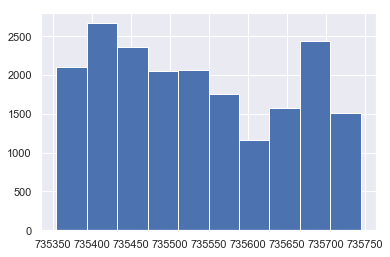

In [96]:
# I just want to look at those dates... not sure what happened.
import matplotlib.pyplot as plt
%matplotlib inline
data.date.hist()

#### Thought I would check for duplicates.

In [97]:
duplicates = data[data.duplicated()]
print(len(duplicates))


0


So I checked duplicates before dropping the 'id' and it shows that 177 of the homes are repeats.
This is probably because they were sold more than once.  
First, it's a really small number. 
Second, all the info is there and the price/date changed. So it's essentially a different house.

#### Here I just wanted to look at value counts for all features to see if I'm missing anything.  But it's only the top 5, so I might need to look at some of them individually.

In [98]:
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(), '\n\n')

date 
 735407    0.006498
735409    0.006194
735422    0.005940
735410    0.005940
735715    0.005838
Name: date, dtype: float64 


price 
 350000.0    0.008224
450000.0    0.007920
550000.0    0.007615
425000.0    0.007260
325000.0    0.007107
Name: price, dtype: float64 


bedrooms 
 3    0.471469
4    0.315210
2    0.134938
5    0.069093
1    0.009290
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.254290
1.00    0.189765
1.75    0.146157
2.25    0.097370
2.00    0.092091
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006803
1400    0.006752
1440    0.006498
1660    0.006447
1010    0.006397
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.017565
6000    0.014265
4000    0.012590
7200    0.010763
4800    0.005940
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.508427
2.0    0.366738
1.5    0.088689
3.0    0.029902
2.5    0.005940
Name: floors, dtype: float64 


waterfront 
 0.0    0.995126
1.0    0.004874
Name: waterfront, dtype: float64 


view 
 0.

#### Then I tried a histogram plot of all the features.

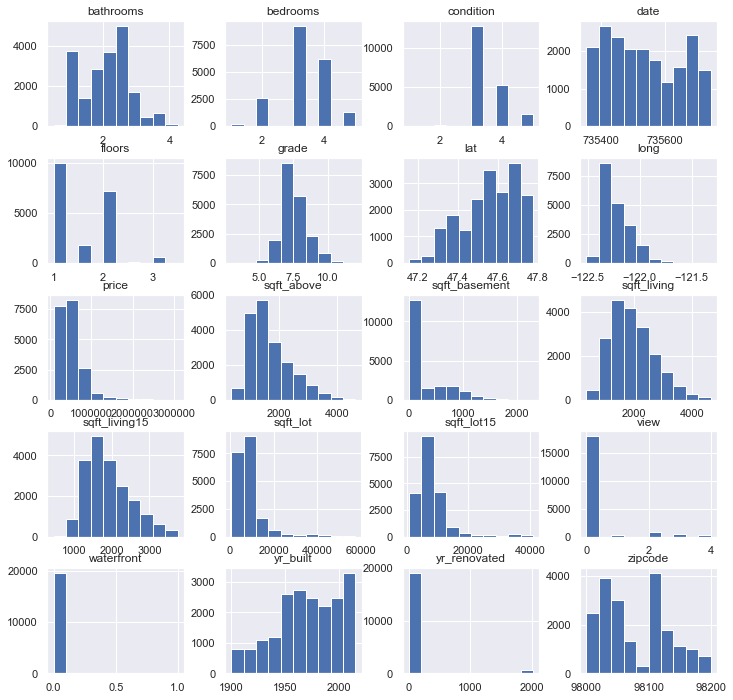

In [99]:
data.hist(figsize  = [12, 12]);

Are all the graphs there?  Looks like 'waterfront', 'condition', 'floors', 'view', and possibly 'grade' are the categorical variables. 

## Heteroskedasticity and Linearity

#### I also wanted to try a scatter matrix to look for continuous and non-continuous variables

In [100]:
# Scatter matrix of all the features (Remove # below to run)
#pd.plotting.scatter_matrix(data, figsize=(12,12));

This takes a long time to load but it helped me see a number of concepts:
* **If the features are continuous or categorical (though object features don't load)**
* **I can also see features look like they have a linear relationship**
* **And the scatter plots also help me see heteroskedasticity**

I was able to individually look at the regplots of many of the features but couldn't figure out how to create a subplot that iterated through all columns verses the price.

## Multicollinearity of Features

In [101]:
# Here I used the correlation matrix (Remove # below to run)
# data.corr()

In [102]:
# Here I looked at the same with the correlation set to .75 (Remove # below to run)
# abs(data.corr()) > 0.75

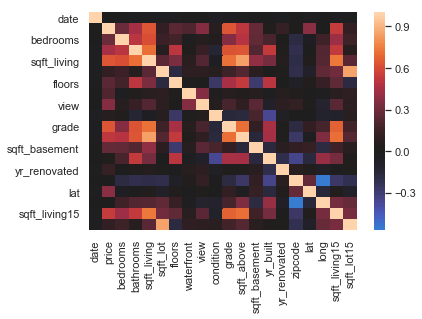

In [103]:
# I find the heat map to be the easiest to read.
import seaborn as sns
sns.heatmap(data.corr(), center=0);

Looking at this heat map I can see that there are a couple of features that may cause multicollinearity. In particular 'sqft_above' and 'grade'.  But also the neighboring living_size and lot_size matter.

## King County Maps

Text(0.5, 1.0, 'King County Homes in Dataset')

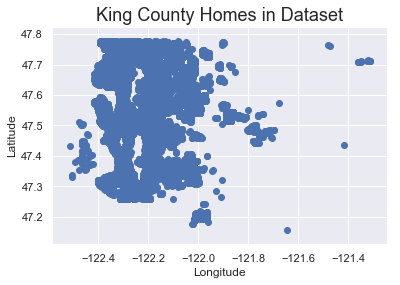

In [104]:
# This is an attempt to look at where the homes in the dataset are located.
import seaborn as sns
plt.scatter(data['long'],data['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("King County Homes in Dataset", fontsize=18)

In [105]:
# Use folium to view a map of Seattle and surrounding area.
import folium
m = folium.Map(location=[47.5, -121.6], zoom_start=9, width=700, height=500)
m.fit_bounds("1153346")
m
# I can't get it to draw the King County boarder.

In [106]:
# I viewed this zipcode map to get an idea of where the different zones were in King County.
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.kingcounty.gov/~/media/operations/GIS/maps/vmc/images/zipcodes_586.ashx?la=en", width=700, height=500)

In [107]:
# Still not sure what to do with 'zipcodes'

## Binning Categorical Data

In [108]:
# Create bins for 'yr_renovated' based on the values observed. 6 values will result in 5 bins
bins_A = [0, 1900, 1990, 2000, 2008, 2015]
bins_yr_renovated = pd.cut(data['yr_renovated'], bins_A)
bins_yr_renovated = bins_yr_renovated.cat.as_ordered()

yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr_ren")
data = data.drop(["yr_renovated"], axis=1)
data = pd.concat([data, yr_renovated_dummy], axis=1)

In [109]:
# Create bins for 'sqft_basement' based on the values observed. 3 values will result in 2 bins
bins_B = [0, 100, 5000]
bins_sqft_basement = pd.cut(data['sqft_basement'], bins_B)
bins_sqft_basement = bins_sqft_basement.cat.as_ordered()

sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix="sqft_base", drop_first=True)
data = data.drop(["sqft_basement"], axis=1)
data = pd.concat([data, sqft_basement_dummy], axis=1)

In [110]:
# Create bins for 'view' based on the values observed. 3 values will result in 2 bins
bins_C = [0, 2, 4]
bins_view = pd.cut(data['view'], bins_C)
bins_view = bins_view.cat.as_ordered()

view_dummy = pd.get_dummies(bins_view, prefix="new_view", drop_first=True)
data = data.drop(["view"], axis=1)
data = pd.concat([data, view_dummy], axis=1)

In [111]:
# Create bins for 'grade' based on the values observed. 3 values will result in 2 bins
bins_D = [0, 5, 7, 13]
bins_grade = pd.cut(data['grade'], bins_D)
bins_grade = bins_grade.cat.as_ordered()

grade_dummy = pd.get_dummies(bins_grade, prefix="new_grade", drop_first=True)
data = data.drop(["grade"], axis=1)
data = pd.concat([data, grade_dummy], axis=1)

In [112]:
# Create bins for 'waterfront' based on the values observed. 3 values will result in 2 bins
# Not sure how to make only two bins without using the decimal.
bins_E = [0, 0.5, 1]
bins_waterfront = pd.cut(data['waterfront'], bins_E)
bins_waterfront = bins_waterfront.cat.as_ordered()

waterfront_dummy = pd.get_dummies(bins_waterfront, prefix="new_waterfront", drop_first=True)
data = data.drop(["waterfront"], axis=1)
data = pd.concat([data, waterfront_dummy], axis=1)

In [113]:
# Create bins for 'condition' based on the values observed. 6 values will result in 5 bins
bins_G = [0, 1, 2, 3, 4, 5]
bins_condition = pd.cut(data['condition'], bins_G)
bins_condition = bins_condition.cat.as_ordered()

condition_dummy = pd.get_dummies(bins_condition, prefix="new_condition")
data = data.drop(["condition"], axis=1)
data = pd.concat([data, condition_dummy], axis=1)

In [114]:
# Let's see those new bins!
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,...,"sqft_base_(100, 5000]","new_view_(2, 4]","new_grade_(5, 7]","new_grade_(7, 13]","new_waterfront_(0.5, 1.0]","new_condition_(0, 1]","new_condition_(1, 2]","new_condition_(2, 3]","new_condition_(3, 4]","new_condition_(4, 5]"
count,19698.000000,1.969800e+04,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,...,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000,19698.000000
mean,735535.550157,5.029458e+05,3.299878,2.045855,1961.915169,8697.566149,1.480556,1690.163062,1970.216519,98080.220225,...,0.375267,0.030308,0.533404,0.454158,0.004874,0.001320,0.007412,0.647020,0.263986,0.080262
std,112.904370,2.822532e+05,0.820846,0.696856,756.201723,6996.604293,0.541170,702.312624,29.587943,54.066263,...,0.484204,0.171437,0.498896,0.497907,0.069643,0.036308,0.085775,0.477909,0.440803,0.271705
min,735355.000000,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,735436.000000,3.150000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,1170.000000,1950.000000,98033.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,735522.000000,4.380000e+05,3.000000,2.000000,1850.000000,7320.000000,1.000000,1510.000000,1973.000000,98072.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,735646.000000,6.135000e+05,4.000000,2.500000,2420.000000,9786.750000,2.000000,2090.000000,1996.000000,98118.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,735745.000000,3.100000e+06,5.000000,4.250000,4645.000000,57599.000000,3.500000,4620.000000,2015.000000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


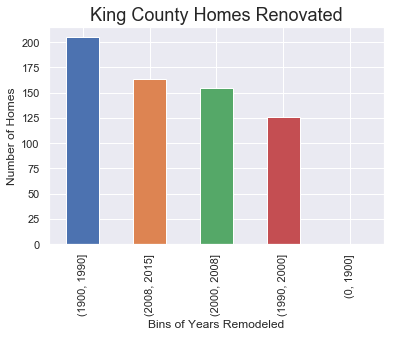

In [115]:
# I also want to see how they look here.
bins_yr_renovated.value_counts().plot(kind='bar')
plt.xlabel('Bins of Years Remodeled')
plt.ylabel('Number of Homes')
plt.title("King County Homes Renovated", fontsize=18)
plt.show()

### Log Transformation: These features have right skewed histograms
'sqft_above', 'sqft_lot', 'sqft_living', 'sqft_living15', 'sqft_lot15'

Text(0.5, 1.0, 'sqft_lot15')

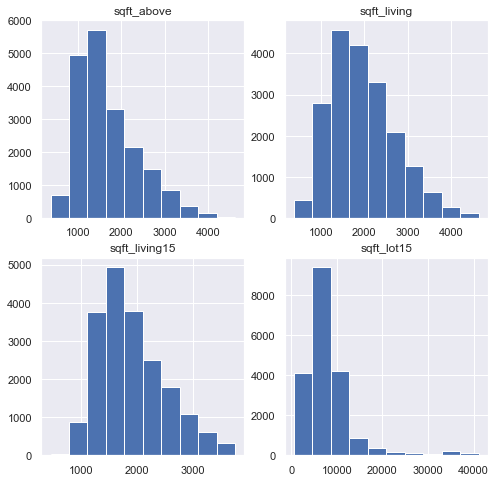

In [116]:
# I just want to look at a couple of these again BEFORE the transformation.
new_figure = plt.figure(figsize=(8,8))

ax1 = plt.subplot(2, 2, 1)
data.sqft_above.hist(ax=ax1)
ax1.set_title("sqft_above")

ax2 = plt.subplot(2, 2, 2)
data.sqft_living.hist(ax=ax2)
ax2.set_title('sqft_living')

ax3 = plt.subplot(2, 2, 3)
data.sqft_living15.hist(ax=ax3)
ax3.set_title("sqft_living15")

ax4 = plt.subplot(2, 2, 4)
data.sqft_lot15.hist(ax=ax4)
ax4.set_title('sqft_lot15')

In [117]:
# Perform log transformation - import numpy
import numpy as np
logabove = np.log(data["sqft_above"])
loglot = np.log(data["sqft_lot"])
logliving = np.log(data["sqft_living"])
loglivingnear = np.log(data["sqft_living15"])
loglotnear = np.log(data["sqft_lot15"])

# Switch the Standardization into the original data
data["sqft_above"] = (logabove-np.mean(logabove))/np.sqrt(np.var(logabove))
data["sqft_lot"] = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
data["sqft_living"] = (logliving-np.mean(logliving))/np.sqrt(np.var(logliving))
data["sqft_living15"] = (loglivingnear-np.mean(loglivingnear))/np.sqrt(np.var(loglivingnear))
data["sqft_lot15"] = (loglotnear-np.mean(loglotnear))/(np.sqrt(np.var(loglotnear)))

Text(0.5, 1.0, 'sqft_lot15')

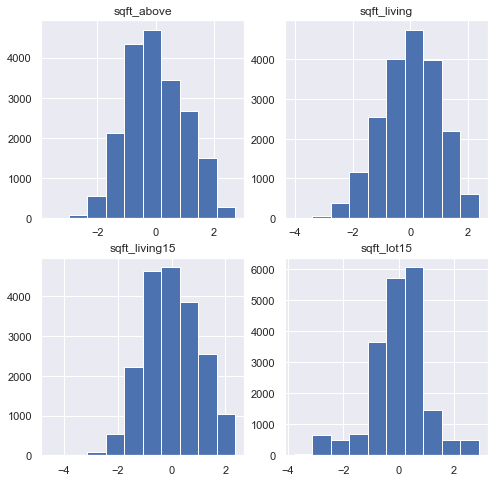

In [118]:
# Let's see how different those graphs look after the transformation.
new_figure = plt.figure(figsize=(8,8))

ax1 = plt.subplot(2, 2, 1)
data.sqft_above.hist(ax=ax1)
ax1.set_title("sqft_above")

ax2 = plt.subplot(2, 2, 2)
data.sqft_living.hist(ax=ax2)
ax2.set_title('sqft_living')

ax3 = plt.subplot(2, 2, 3)
data.sqft_living15.hist(ax=ax3)
ax3.set_title("sqft_living15")

ax4 = plt.subplot(2, 2, 4)
data.sqft_lot15.hist(ax=ax4)
ax4.set_title('sqft_lot15')

In [119]:
# Much better.  Much more normal looking and centered around zero.

## Time to run a model (even though you know I have over a dozen!)

In [120]:
# We already dropped "id". Now I'm going to drop 'zipcode' because I don't know what to do with it!
y = pd.DataFrame(data, columns = ['price'])
X = data.drop(["price", "zipcode"], axis=1)

In [121]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1247.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:01:18   Log-Likelihood:            -2.6582e+05
No. Observations:               19698   AIC:                         5.317e+05
Df Residuals:                   19672   BIC:                         5.319e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
date                         89.3704     11.130      8.029      0.000      67.554     111.187
bedrooms                  -2.281e+04   2056.649    -11.092      0.000   -2.68e+04   -1.88e+04
bathrooms                  4.668e+04   3214.281     14.522      0.000    4.04e+04     5.3e+04
sqft_living                2.973e+04   5065.034      5.870      0.000    1.98e+04    3.97e+04
sqft_lot                  -7994.1138   3168.762     -2.523      0.012   -1.42e+04   -1783.073
floors                     1513.6730   3876.186      0.391      0.696   -6083.980    9111.326
sqft_above                  8.77e+04   4987.429     17.585      0.000    7.79e+04    9.75e+04
yr_built                  -1946.8663     65.896    -29.544      0.000   -2076.028   -1817.704
lat                        6.191e+05   9619.754     64.357      0.000       6e+05    6.38e+05
long                      -1.012e+05   1.14e+04     -8.914      0.000   -1.24e+05    -7.9e+04
sqft_living15              4.919e+04   2033.197     24.193      0.000    4.52e+04    5.32e+04
sqft_lot15                -8917.6400   3062.263     -2.912      0.004   -1.49e+04   -2915.346
yr_ren_(0, 1900]          -4.012e-08   3.23e-09    -12.411      0.000   -4.65e-08   -3.38e-08
yr_ren_(1900, 1990]       -3.338e+04   1.26e+04     -2.655      0.008    -5.8e+04   -8738.163
yr_ren_(1990, 2000]        8.598e+04   1.59e+04      5.395      0.000    5.47e+04    1.17e+05
yr_ren_(2000, 2008]        1.432e+05   1.45e+04      9.875      0.000    1.15e+05    1.72e+05
yr_ren_(2008, 2015]         7.99e+04   1.41e+04      5.678      0.000    5.23e+04    1.07e+05
sqft_base_(100, 5000]      5.442e+04   5339.799     10.192      0.000     4.4e+04    6.49e+04
new_view_(2, 4]            2.032e+05   8161.746     24.901      0.000    1.87e+05    2.19e+05
new_grade_(5, 7]          -2.401e+04   1.18e+04     -2.035      0.042   -4.71e+04    -879.466
new_grade_(7, 13]          6.432e+04   1.25e+04      5.159      0.000    3.99e+04    8.88e+04
new_waterfront_(0.5, 1.0]  5.066e+05   1.96e+04     25.882      0.000    4.68e+05    5.45e+05
new_condition_(0, 1]      -1.034e+08   8.33e+06    -12.403      0.000    -1.2e+08    -8.7e+07
new_condition_(1, 2]      -1.033e+08   8.33e+06    -12.397      0.000    -1.2e+08    -8.7e+07
new_condition_(2, 3]      -1.033e+08   8.33e+06    -12.396      0.000    -1.2e+08    -8.7e+07
new_condition_(3, 4]      -1.033e+08   8.33e+06    -12.392      0.000    -1.2e+08   -8.69e+07
new_condition_(4, 5]      -1.032e+08   8.33e+06    -12.387      0.000    -1.2e+08   -8.69e+07
==============================================================================
Omnibus:                    10757.151   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168043.966
Skew:                     

## Test/Train Split

In [122]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

14773 4925 14773 4925


In [123]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [125]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 31383488737.01076
Test Mean Squarred Error: 29206719965.242855


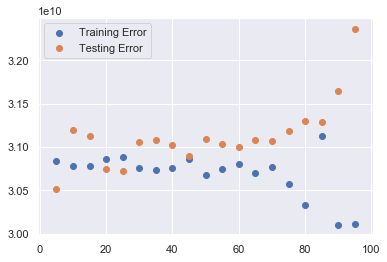

In [126]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [127]:
#Cross Validation Score of top 5 features
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_5_results

array([-2.98460284e+10, -2.91739217e+10, -2.72368038e+10, -3.31914181e+10,
       -3.66886728e+10])

## Summary #1

The r^2 is 0.61 which is not great. And there are P values that I need to deal with - 'floors' and 'sqft_lot' (probably due to multicolinearity). The test and train MSE are pretty close to each other: 3.04 x e^10 which is good.  

## Again...

In [128]:
# This time I'm going to get rid of "floors" and "yr_ren_(1900, 1990]" due to high P-values.
y = pd.DataFrame(data, columns = ['price'])
X = data.drop(["price", "floors", 'sqft_lot', "new_grade_(5, 7]"], axis=1)

In [129]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1376.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:02:06   Log-Likelihood:            -2.6573e+05
No. Observations:               19698   AIC:                         5.315e+05
Df Residuals:                   19674   BIC:                         5.317e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
date                         88.4971     11.077      7.989      0.000      66.785     110.210
bedrooms                  -2.408e+04   2047.551    -11.761      0.000   -2.81e+04   -2.01e+04
bathrooms                  4.717e+04   3132.945     15.056      0.000     4.1e+04    5.33e+04
sqft_living                2.877e+04   4983.557      5.773      0.000     1.9e+04    3.85e+04
sqft_above                 8.824e+04   4753.159     18.565      0.000    7.89e+04    9.76e+04
yr_built                  -2044.3186     64.473    -31.708      0.000   -2170.691   -1917.946
zipcode                    -411.6335     29.825    -13.802      0.000    -470.093    -353.174
lat                        6.474e+05   9735.236     66.506      0.000    6.28e+05    6.67e+05
long                      -1.743e+05   1.23e+04    -14.115      0.000   -1.98e+05    -1.5e+05
sqft_living15              4.704e+04   2028.234     23.193      0.000    4.31e+04     5.1e+04
sqft_lot15                 -1.73e+04   1520.315    -11.379      0.000   -2.03e+04   -1.43e+04
yr_ren_(0, 1900]          -2.942e-05   3.49e-06     -8.419      0.000   -3.63e-05   -2.26e-05
yr_ren_(1900, 1990]       -3.392e+04   1.25e+04     -2.713      0.007   -5.84e+04   -9417.395
yr_ren_(1990, 2000]        8.494e+04   1.59e+04      5.356      0.000    5.39e+04    1.16e+05
yr_ren_(2000, 2008]        1.415e+05   1.44e+04      9.808      0.000    1.13e+05     1.7e+05
yr_ren_(2008, 2015]         7.94e+04    1.4e+04      5.670      0.000    5.19e+04    1.07e+05
sqft_base_(100, 5000]      5.574e+04   5307.436     10.503      0.000    4.53e+04    6.61e+04
new_view_(2, 4]            2.107e+05   8141.025     25.879      0.000    1.95e+05    2.27e+05
new_grade_(7, 13]          8.888e+04   3473.989     25.585      0.000    8.21e+04    9.57e+04
new_waterfront_(0.5, 1.0]  5.117e+05   1.95e+04     26.285      0.000    4.74e+05     5.5e+05
new_condition_(0, 1]      -7.245e+07    8.6e+06     -8.427      0.000   -8.93e+07   -5.56e+07
new_condition_(1, 2]       -7.24e+07    8.6e+06     -8.421      0.000   -8.92e+07   -5.55e+07
new_condition_(2, 3]      -7.239e+07    8.6e+06     -8.420      0.000   -8.92e+07   -5.55e+07
new_condition_(3, 4]      -7.236e+07    8.6e+06     -8.417      0.000   -8.92e+07   -5.55e+07
new_condition_(4, 5]      -7.232e+07    8.6e+06     -8.412      0.000   -8.92e+07   -5.55e+07
==============================================================================
Omnibus:                    10613.053   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165642.576
Skew:                           2.243   Prob(JB):                         0.00
Kurtosis:                      16.479   Cond. No.                     6.89e+24
========================================================

## Summary #2

The r^2 is 0.62 which is about the same. But now the P values are all zero. Even though I was really curious about the 'condition' feature and believed that it should have something to do with the outcome of price it seems to be prety unrelated.  In fact, the regplot showed that it wasn't linear to the 'price' feature and binning it into all those seperate bins didn't make any difference either. 

My main focus was on 'yr_renovated'. I really hoped that by binning it in different decades I could determine how important recent renovations where to sales price. And the fact that the homes without any renovations, yr_ren_(0, 1900], had a negative coefficient meaning that it would indirectly affect the price.  Whereas recent renovations, yr_ren_(2000, 2008], had the highest coefficient and one of the highest overall, which is strange since such a small percent of the data had any renovations. 

In [130]:
# Use feature ranking to select the 5 most important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False, False, False])

In [131]:
X.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_ren_(0, 1900]', 'yr_ren_(1900, 1990]', 'yr_ren_(1990, 2000]',
       'yr_ren_(2000, 2008]', 'yr_ren_(2008, 2015]', 'sqft_base_(100, 5000]',
       'new_view_(2, 4]', 'new_grade_(7, 13]', 'new_waterfront_(0.5, 1.0]',
       'new_condition_(0, 1]', 'new_condition_(1, 2]', 'new_condition_(2, 3]',
       'new_condition_(3, 4]', 'new_condition_(4, 5]'],
      dtype='object')

In [132]:
# Use feature ranking to select the 5 most important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False, False, False])

### Top 5 columns 
'lat', 'long', 'renovated recently 2000-2008' 'view of 2 or 3', 'new_waterfront'

In [133]:
#Fit the linear regression model again using the 5 selected columns
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
# Predict the y_hat
yhat = linreg.predict(X[selected_columns])
yhat

array([[447211.91629502],
       [807400.47432466],
       [619072.36774737],
       ...,
       [510285.53588406],
       [464875.56216551],
       [510058.10696727]])

In [135]:
# Compare and contrast two models with the R-squared and adjusted R-squared
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
print(r_squared)
print(adjusted_r_squared)

price    0.251261
dtype: float64
price    0.251071
dtype: float64
